







# ORIE 4580/5580/5581 Assignment 3

#### Student: Emily Molaro (esm229)

### Github link: 

### Instructions


* Due Friday September 22, at 11.59am on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/56826#:~:text=Assignments-,Assignments,-Assignments%20Module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Bard or ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**. You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from scipy.stats import geom
%matplotlib inline

___
___

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


___
**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).
___

In [ ]:
# Functions to visualize LCG sequence on clock (see demo notebook)

def plot_clock_face(m, fig, annotate=False):
    """
    Plot points on a unit circle representing the LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    annotate (bool): Whether to annotate points with their index.

    Returns:
    None
    """
    # Plot m points on the unit circle
    for i in range(m):
        theta = 2.0 * np.pi * i / m
        plt.plot(np.sin(theta), np.cos(theta), 'rs', markersize = 10)
        if annotate:
            plt.annotate(str(i), (np.pi/2 - theta, 1.05), xycoords='polar')

def plot_clock_path(m, x, fig, color='y'):
    """
    Plot the path of an LCG sequence on a clock face.

    Parameters:
    m (int): The modulus value for the LCG sequence.
    x (numpy.ndarray): The LCG sequence.
    fig (matplotlib.figure.Figure): The figure object to draw on.
    color (str): The color for the path.

    Returns:
    None
    """
    # Plot the seed node
    theta_0 = 2.0 * np.pi * (x[0] * (m + 1) - 1) / m
    plt.plot(np.sin(theta_0), np.cos(theta_0), 'gs', markersize = 10)

    # Plot the path of the LCG sequence
    for i in range(len(x) - 1):
        theta_start = 2.0 * np.pi * (x[i] * (m + 1) - 1) / m
        theta_end = 2.0 * np.pi * (x[i + 1] * (m + 1) - 1) / m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x) > 0 or abs(del_y) > 0:
            plt.arrow(x_start, y_start, del_x, del_y,
                      length_includes_head=True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [ ]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def LCG(n, m=2**31-1, a=1103515245, c=12345, seed=1):
    """
    Generate a pseudorandom sequence using a Linear Congruential Generator (LCG).

    Parameters:
    n (int): The number of pseudorandom numbers to generate.
    m (int): The modulus value (default is 2^31-1, following glibc specifications).
    a (int): The multiplier value (default is 1103515245, following glibc specifications).
    c (int): The increment value (default is 12345, following glibc specifications).
    seed (int): The initial seed value (default is 1).

    Returns:
    numpy.ndarray: An array of pseudorandom numbers in the range [0, 1).
    """
    # Initialize an array to store the generated pseudorandom numbers
    output = np.zeros(n)
    output2 = np.zeros(n)

    x = seed
    for i in range(n):
        # Calculate the pseudorandom number and normalize it to [0, 1)
        output[i] = (x + 1.0) / (m + 1.0)
        output2[i] = x

        # Update the LCG state using the specified parameters
        x = (a * x + c) % m

    return output, output2

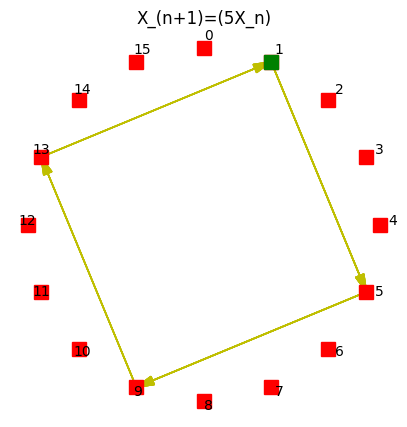

In [ ]:
# Ans
m = 16
a = 5
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
x, ux = LCG(n=m^2+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,x,fig)
plt.axis('equal')
plt.axis('off')
plt.title('X_(n+1)=(5X_n)')
plt.show()

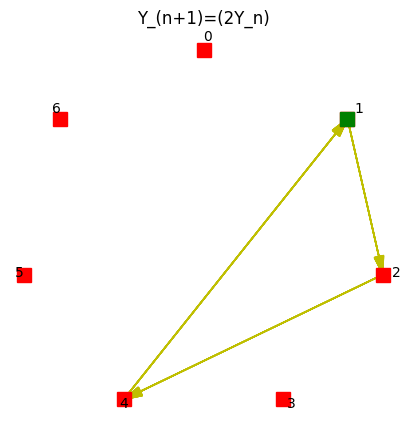

In [ ]:
# Ans Y
m = 7
a = 2
c = 0
seed = 1

fig = plt.figure(figsize=(5,5))
y, uy = LCG(n=16^2+1,m=m,a=a,c=c,seed = seed)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,y,fig)
plt.axis('equal')
plt.axis('off')
plt.title('Y_(n+1)=(2Y_n)')
plt.show()

___
**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.
___

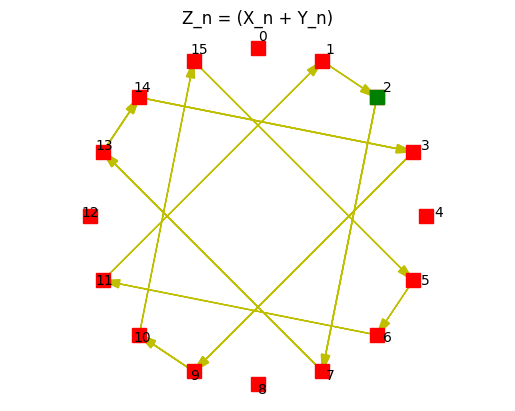

In [ ]:
# Ans

m = 16
c= 0
seed = 1

z = (ux+uy) % m
w = (z + 1.0)/(m + 1.0)

plot_clock_face(m,fig,annotate = True)
plot_clock_path(m,w,fig)
plt.axis('equal')
plt.axis('off')
plt.title('Z_n = (X_n + Y_n)')
plt.show()

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

Period $x_n = 4$ \\
Period $y_n = 3$ \\
Period $z_n = 12 $


___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

$$F^{-1}(y)=
	\begin{cases}
	0 & \mbox{for $y < 0$}\\
	y & \mbox{for $0 \leq y \geq \frac{1}{2}$}, \\
	1 & \mbox{for $y > \frac{1}{2}$}
	 \end{cases}$$

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

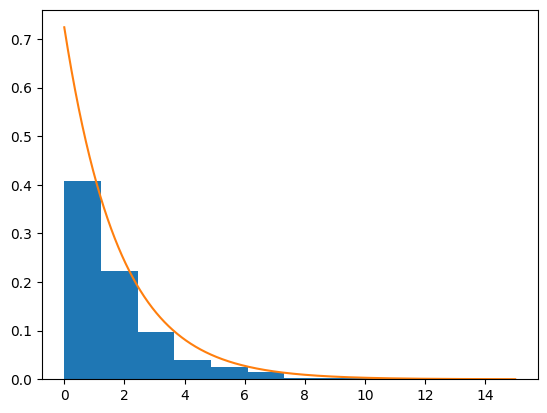

In [ ]:
#Inversion Algorithm

#number of samples to generate
n = 1000

#defining the cdf of the series
def f(x):
  y = (np.log(1-x)/(np.log(1-0.43)))
  return y

#Step 1 of Inversion Algorithm, generate U~Uniform[0,1]
U = np.random.uniform(0,1,n)

#Step 2 of Inversion Algorithm set X = F^(-1)(U)
samples = []
for i in range(n):
  x = f(U[i])
  samples.append(x)

#defining the pmf
x = np.linspace(0, 15, 1000)
pmf = 0.42*(1-0.42)**(x-1)

plt.hist(samples, density=1)
plt.plot(x,pmf)

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

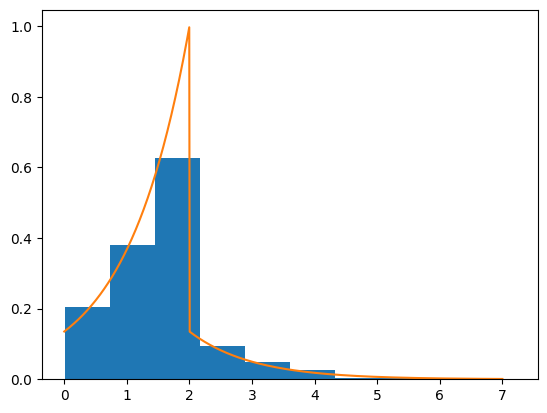

In [ ]:
#Inversion Algorithm

#number of samples to generate
n = 1000

#defining the cdf of f(x)
def f(x):
  if x <= 1 -np.exp(-2):
    y = np.log(x*np.exp(2)+1)
  elif x > 1-np.exp(-2):
    y = -np.log(1-x)
  return y

#Step 1 of Inversion Algorithm: Generate U~Unif[0,1]
U = np.random.uniform(0,1,n)

#Step 2 of Inversion Algorithm: X = F-1(U)
samples = []
for i in range(n):
    V = f(U[i])
    samples.append(V)

#defining the pdf
x = np.linspace(0, 7, 1000)
pdfsamples = []

def pdf(x):
  if x <= 2:
    w = np.exp(x-2)
  elif x > 2:
    w = np.exp(-x)
  return w

for i in x:
  g = pdf(i)
  pdfsamples.append(g)

plt.hist(samples, density=1)
plt.plot(x,pdfsamples)


___
___

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

___
**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

___

### Ans.


In [ ]:
#Acceptance/Rejection Algorithm

#number of samples of X
n = 1000

#f(x)
def f(x):
  y = (5*x**4 + 4*x**3 + 3*x**2 + 1)/4
  return y

#Calculate the Maximum of f(x)
m = 13/4

#Step 1: Generate (U,V) with U~Uniform[a,b] and V~Uniform[0,m]
U = np.random.uniform(0,1,n)
V = np.random.uniform(0,m,n)

#initialize list for samples of X
samples = []
x = np.linspace(0, 1, 1000)
pdf = (5*x**4 + 4*x**3 + 3*x**2 + 1)/4

#Step 2: if V <= f(U), keep X=U, else return
for i in range(n):
  if V[i] <= f(U[i]):
    samples.append(U[i])

___
**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?
___

### Ans.

Probability sample is accepted is $\frac{1}{M(b-a)} = 2*\frac{1}{M} =
\frac{2}{\frac{13}{4}} = \frac{8}{13}$ \\

So, the probability X will be accepted on the first try, with 95% confidence is $(1-\frac{8}{13})^{n} = .05$ \\
n ~= 4

___
**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.
___


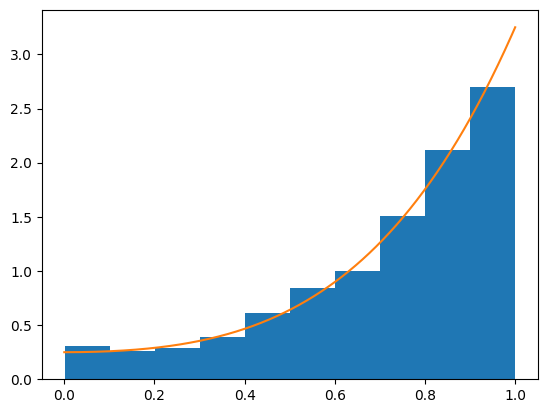

In [ ]:
#Acceptance/Rejection Algorithm

#number of samples of X
n = 4*2500

#f(x)
def f(x):
  y = (5*x**4 + 4*x**3 + 3*x**2 + 1)/4
  return y

#maximum of f(x)
m = 13/4

#Step 1: Generate (U,V) with U~Uniform[a,b] and V~Uniform[0,m]
U = np.random.uniform(0,1,n)
V = np.random.uniform(0,m,n)

#initialize list for samples of X
samples = []
x = np.linspace(0, 1, 1000)
pdf = (5*x**4 + 4*x**3 + 3*x**2 + 1)/4

#Step 2: if V <= f(U), keep X=U, else return
for i in range(n):
  if V[i] <= f(U[i]):
    samples.append(U[i])

plt.hist(samples, density=1)
plt.plot(x,pdf)

___
___

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

:___

**(a)** First, suppose we choose the proposal distribution to be a \emph {Laplace} (i.e., two-sided Exponential) distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.
___

(array([1.67234932, 1.43845431, 1.48523331, 1.23964355, 0.91219054,
        1.2747278 , 0.88880104, 1.07591705, 0.79524303, 0.91219054]),
 array([0.50072205, 0.5862305 , 0.67173896, 0.75724741, 0.84275586,
        0.92826431, 1.01377276, 1.09928121, 1.18478966, 1.27029811,
        1.35580656]),
 <BarContainer object of 10 artists>)

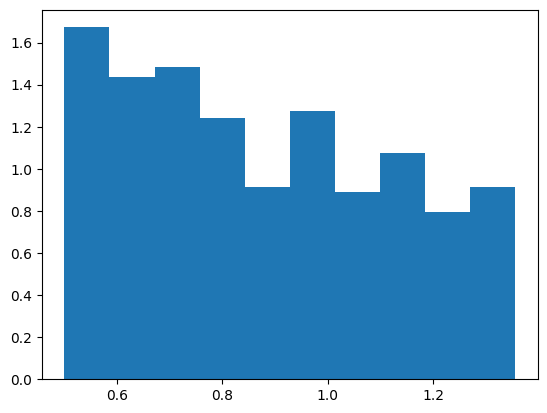

In [89]:
#Inversion Algorithm

#number of samples to generate
n = 1000

#defining the Laplace cdf
def Laplace(x):
  y = (x*math.exp(x)/(2*x))
  return y

#Step 1 of Inversion Algorithm, generate U~Uniform[0,1]
U = np.random.uniform(0,1,n)

#Step 2 of Inversion Algorithm set X = F^(-1)(U)
samplesLaplace = []

for i in range(n):
  v = Laplace(U[i])
  samplesLaplace.append(v)


plt.hist(samplesLaplace, density=1)

___
**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.
___

### Ans.
$k \ge \frac{f(x)}{g(x)} = \frac{\frac{e^\frac{-x^2}{2}}{\sqrt{2\pi}}}{\frac{e^-|x|}{2}} = \sqrt{\frac{2e}{\pi}}e^{\frac{-(|x|-1)^2}{2}}$ \\
The maximum of this function is at x=1, so the smallest k value is\
$k = \sqrt{\frac{2e}{\pi}}$\
The expected number of samples is then \
$\frac{1}{\sqrt{\frac{2e}{\pi}}}$


___
**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.
___

(array([0.01500931, 0.05103166, 0.14709127, 0.19211921, 0.37523282,
        0.42026076, 0.35121792, 0.21913597, 0.05103166, 0.01801118]),
 array([-2.81521678, -2.27178039, -1.728344  , -1.18490761, -0.64147121,
        -0.09803482,  0.44540157,  0.98883796,  1.53227436,  2.07571075,
         2.61914714]),
 <BarContainer object of 10 artists>)

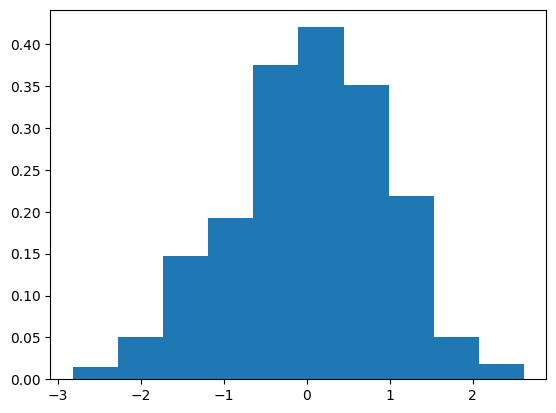

In [119]:
#Acceptance/Rejection Algorithm

#number of samples of X
n = 1000

#pdf of f(x)
def f(x):
  y = math.exp((-x**2)/2)/(np.sqrt(2*np.pi))
  return y

#maximum of f(x)
m = np.sqrt(2*np.exp(1)/np.pi)

#Step 1: Generate (U,V) with U~Uniform[a,b] and V~Uniform[0,m]
U = np.random.normal(0,1,n)
V = np.random.normal(0,m,n)

#initialize list for samples of X
samples = []

#Step 2: if V <= f(U), keep X=U, else return
for i in range(n):
  if V[i] <= m*f(U[i]):
    samples.append(U[i])

plt.hist(samples, density=1)

___
**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.
___

Note: I know these should be a very, very skinny peak with really long tails, but I have no idea where I went wrong.

(array([3.60215864, 3.20191879, 3.04182285, 2.9217509 , 3.80227856,
        3.56213465, 3.36201473, 4.92295014, 5.16309405, 6.44386157]),
 array([7.48940506e-05, 2.50599125e-02, 5.00449309e-02, 7.50299494e-02,
        1.00014968e-01, 1.24999986e-01, 1.49985005e-01, 1.74970023e-01,
        1.99955042e-01, 2.24940060e-01, 2.49925078e-01]),
 <BarContainer object of 10 artists>)

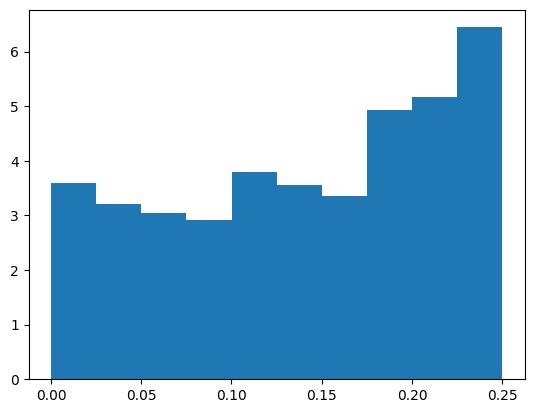

In [114]:
#Inversion Algorithm

#number of samples to generate
n = 1000

#defining the cdf of the series
def Cauchy(x):
  y = math.atan(x)/math.pi
  return y

#Step 1 of Inversion Algorithm, generate U~Uniform[0,1]
U = np.random.uniform(0,1,n)

#Step 2 of Inversion Algorithm set X = F^(-1)(U)
samplesCauchy = []

for i in range(n):
  x = Cauchy(U[i])
  samplesCauchy.append(x)

plt.hist(samplesCauchy, density=1)

___
**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.
___

### Ans.
$k \ge \frac{f(x)}{g(x)} = \frac{\frac{e^\frac{-x^2}{2}}{\sqrt{2\pi}}}{\frac{1}{\pi + x^2}}$ \\
The maximum of this function is at x=0, so the smallest k value is\
$k = \frac{\pi}{\sqrt{2\pi}}$\
The expected number of samples is then \
$\frac{\sqrt{2\pi}}{\pi}$

(array([1.63251486, 0.94514018, 0.91649957, 1.05970263, 0.77329651,
        1.0024214 , 0.85921835, 0.83057773, 1.11698385, 0.94514018]),
 array([0.00205003, 0.10124166, 0.2004333 , 0.29962493, 0.39881657,
        0.4980082 , 0.59719984, 0.69639147, 0.79558311, 0.89477474,
        0.99396638]),
 <BarContainer object of 10 artists>)

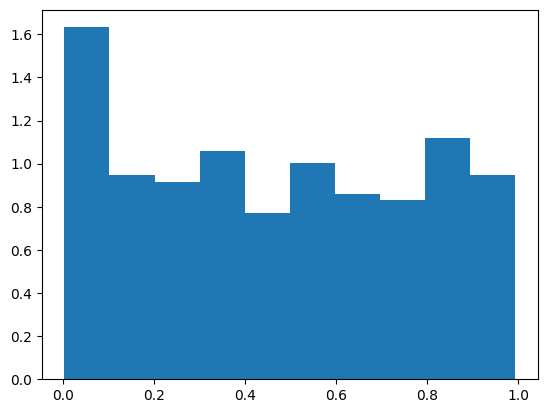

In [123]:
#Acceptance/Rejection Algorithm

#number of samples of X
n = 1000

#pdf of f(x)
def f(x):
  y = math.exp((-x**2)/2)/(np.sqrt(2*np.pi))
  return y

#maximum of f(x)
m = np.pi/np.sqrt(2*np.pi)

#Step 1: Generate (U,V) with U~Uniform[a,b] and V~Uniform[0,m]
U = np.random.uniform(0,1,n)
V = np.random.uniform(0,m,n)

#initialize list for samples of X
samples = []

#Step 2: if V <= f(U), keep X=U, else return
for i in range(n):
  if V[i] <= m*f(U[i]):
    samples.append(U[i])

plt.hist(samples, density=1)